In [62]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (20., 10.0)


In [67]:
def quadratic_func(x):
    return -1* np.square(x) - 4*x

def fit(x, y, deg):
    coeffs = np.polyfit(x, y, deg)
    x_new = np.linspace(x[0], x[-1])
    ffit = np.poly1d(coeffs)
    y_new = ffit(x_new)
    return x_new, y_new

In [75]:
x = np.array([-5, 0.5, 1, 1.1, 3.9, 3.95, 4, 4.05, 4.1])
y = quadratic_func(x)

x1, y1 = fit(x, y, 1)
x2, y2 = fit(x, y, 2)
x3, y3 = fit(x, y, 5)

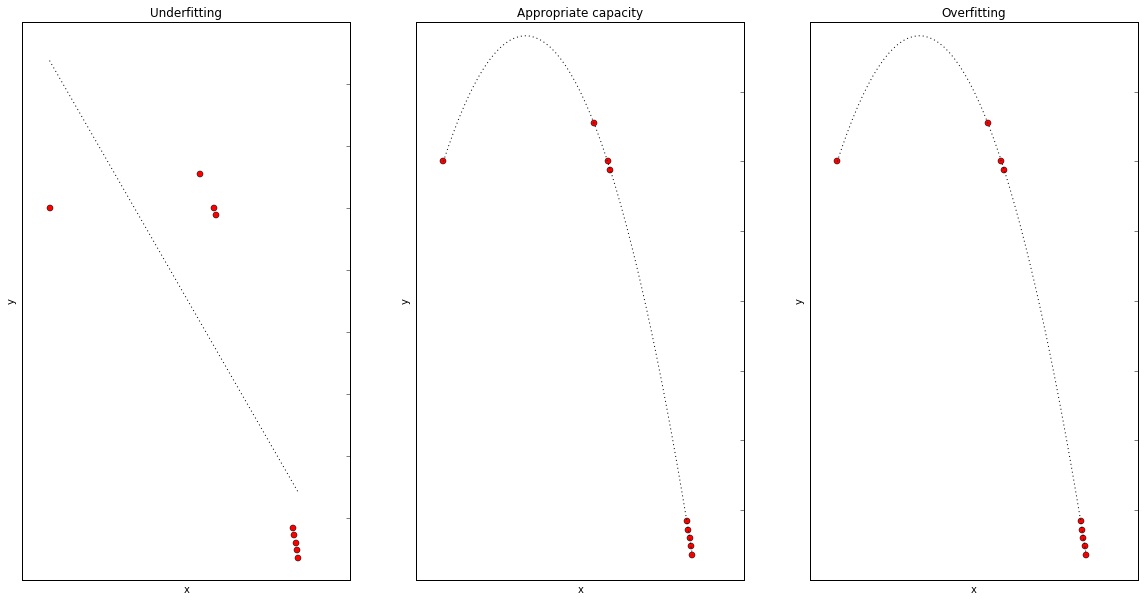

In [76]:
plt.figure(1)
plt.subplot(131)
plt.plot(x, y, 'ro', x1, y1, ':k')
plt.title('Underfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

plt.subplot(132)
plt.plot(x, y, 'ro', x2, y2, ':k')
plt.title('Appropriate capacity')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')

plt.subplot(133)
plt.plot(x, y, 'ro', x3, y3, ':k')
plt.title('Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', left='off', labelleft='off')
plt.show()